In [1]:
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
os.getcwd()
warnings.filterwarnings("ignore")

In [3]:
# Include preprocessing and evaluation
%run 'preprocessing.ipynb'
%run 'evaluation.ipynb'

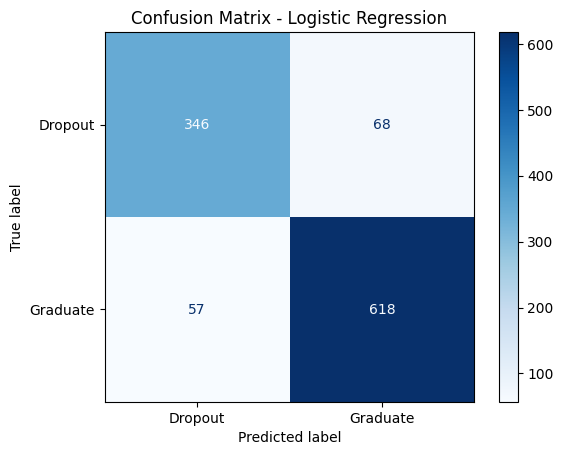


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.86      | 0.84   | 0.85     |
    | Graduate   | 0.90      | 0.92   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.876     |            
    --------------------------
    


In [4]:
# Train a Logistic Regression Model
model_name = 'Logistic Regression'
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, model_name))

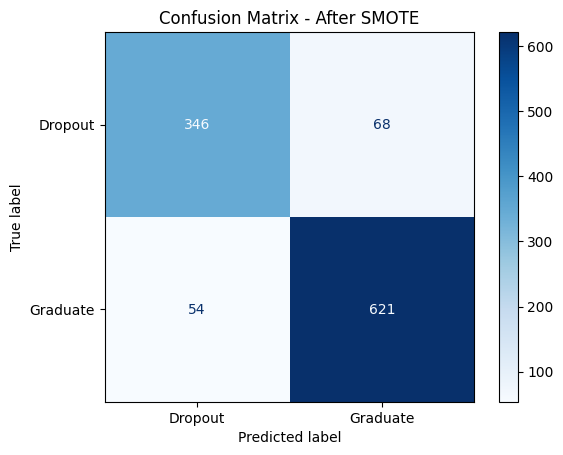


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.86      | 0.84   | 0.85     |
    | Graduate   | 0.90      | 0.92   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.878     |            
    --------------------------
    


In [5]:
# Handle class imbalance using SMOTE
X_train, X_test, y_train, y_test = preprocessing(test_size, True)

# Train the Random Forest model on the resampled dataset
rf_model = LogisticRegression(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_rf_pred, 'After SMOTE'))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Best Accuracy: 0.8911419780967208


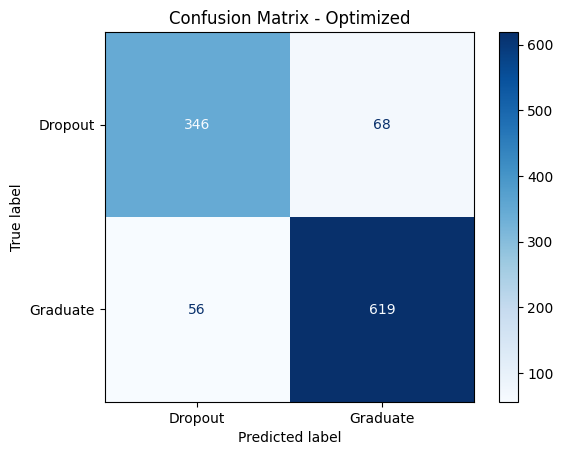


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.86      | 0.84   | 0.85     |
    | Graduate   | 0.90      | 0.92   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.876     |            
    --------------------------
    


In [7]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'C': [0.1, 1, 10, 100],                        # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],      # Optimization solvers
    'max_iter': [100, 200, 500],                   # Maximum iterations
    'class_weight': [None, 'balanced']             # Class weight
}
# Create the Random Forest model
logistic = LogisticRegression()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the optimized model
optimized_log = grid_search.best_estimator_
optimized_log.fit(X_train, y_train)

# Evaluate on the test set
y_optimized_pred = optimized_log.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_optimized_pred, 'Optimized'))